# AMS 561 Homework 4

This homework uses pacakges `sympy`, `numpy`, and `scipy`. There are four problems in this homework, with 20 points for each problem. You can choose to solve only three problems or solve all four of them. In the latter case, your grade will be based on the three highest scores of the four problems, for a total of 60 points.

# Problem 1 (20 points)

<img src="http://www.scipy-lectures.org/_images/markov-chain.png" width="400">

Given a set of $n$ states, the Markov chain transition matrix $P$ is an $n\times n$ matrix containing the probability distribution of the transitions between the states. In particular, the transition matrix satisfies the following rules:

1. $0\leq P[i,j]\leq 1$: probability to go from state $i$ to state $j$
2. normalization: $\mathrm{all}(\mathrm{sum}(P,axis=1)==1), p.\mathrm{sum}()==1$

(a) Construct a $5\times 5$ transition matrix $P$ by starting from a random matrix and then normalize each row by dividing it by its row-sum, so that it is a transition matrix.

(See B04-SVDEigen-TrackB.ipynb for an example.)

In [2]:
import numpy as np

# Useful function
p_transition = np.random.rand(5, 5)
p_transition_nor = np.array([p_transition[i, :]/np.sum(p_transition, axis=1)[i] for i in range(len(p_matrix))])

NameError: name 'p_matrix' is not defined

In [ ]:
print('transition matrix 𝑃')
print(p_transition_nor)

(b) Given a probability distribution $p$, the transition matrix $P$ defines a transition rule:
$$p_{new}=P^{T}p.$$

Starts from a random probability distribution $p$ )(normalized, so that its sum is 1) and takes 50 steps to obtain p_50.

In [ ]:
p_distribution = np.random.rand(5)
p_distribution_nor = p_distribution/np.sum(p_distribution)
p_50 = p_distribution_nor
for step in range(50):
    p_50 = np.dot(p_transition_nor.T, p_50)
print('p_50')
print(p_50)

(c) Computes the stationary distribution: the eigenvector of `P.T` with eigenvalue 1 (or numerically, the eigenvalue closest to one) to obtain p_stationary. Remember to divide the eigenvector by its sum and discard the tiny imaginary part.

In [ ]:
import scipy.linalg as la

# Useful functions
evals, evecs = la.eig(p_transition_nor.T)
print('eigenvalue')
print(np.real(evals))

In [ ]:
p_stationary = np.real(evecs)[:,0]/np.sum(np.real(evecs)[:,0])
print('p_stationary')
print(p_stationary)

(d) Check if p_50 and p_stationary are equal to each other within a tolerance of $10^{-5}$.

In [ ]:
tol = p_50-p_stationary
print('tolerance')
print(tol)

## Problem 2 (20 points)

Here is a cubic polynomial with three closely spaced real roots:

$$ p(x) = 816 x^3 - 3835 x^2 + 6000 x - 3125 $$

(a) Use SymPy (http://docs.sympy.org/latest/index.html) to find symbolic expressions for the three roots (i.e., the values of $x$ where $p(x) = 0$). 

(Hint:  Below we show how to use SymPy to solve for the roots of the quadratic polynomial $-x^2  - x + 12$ --- you just need to modify that code once you understand how the code works. Alternatively, use the np.roots() function to compute the roots numerically that we used in a previous homework.)

In [5]:
import sympy

# Modify these to find the roots of the given cubic polynomial
x = sympy.symbols('x')
roots = sympy.roots(816*x**3-3835*x**2+6000*x-3125)
print(roots)




{5/3: 1, 25/16: 1, 25/17: 1}
[1.66666666666667, 1.56250000000000, 1.47058823529412]
[1.66666667 1.5625     1.47058824]


In [6]:
xroots = [sympy.N(r) for r in roots]  # Compute the numerical values 
print('SymPy roots:', xroots)

print('Numpy roots', np.roots([816, -3835, 6000, -3125]))

SymPy roots: [1.66666666666667, 1.56250000000000, 1.47058823529412]
Numpy roots [1.66666667 1.5625     1.47058824]


(b) Plot $p(x)$ for $1.43 \le x \le 1.71$ using a solid line and mark the location of the three roots using circles on the plot.

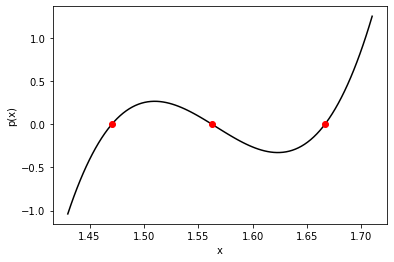

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(1.43, 1.71, 100)
y = 816*x**3-3835*x**2+6000*x-3125
x_root = np.array(xroots)
y_root = 816*x_root**3-3835*x_root**2+6000*x_root-3125

plt.plot(x, y, 'k-', x_root, y_root, 'ro')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()


(c) Use the function [`scipy.optimize.fsolve`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.fsolve.html) with starting guesses $x0=1$, $x0=1.6$ and $x0=1.7$ to compute the three roots.

In [28]:
import scipy.optimize as opt

# Useful function
guesses = [1, 1.6, 1.7]
for i in guesses:
    print(f'{guesses.index(i)+1} root: {opt.fsolve(lambda x:816*x**3-3835*x**2+6000*x-3125, i)[0]}')

1 root: 1.470588235294112
2 root: 1.5625000000001783
3 root: 1.6666666666666585


(d) The secant method can be interpreted as using a finite difference approximation to estimate the derivative in Newton's method. Similar to the bisection method, the secant method uses two data points to determine a third one at each step. However, it uses not only the signs but also the values to draw a secant line through two points.

<img src="https://www.ams.sunysb.edu/~jiao/teaching/ams561/images/secant.png" width="400">

The slope of the scant is given by
$$s_k = \frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}.$$
The intersection of the secant with the $x$ axis is then
$$x_{k+1} = x_k - \frac{f(x_k)}{s_k} = x_k + \frac{x_k-x_{k-1}}{f(x_{k-1}) / f(x_k) - 1}.$$

Complete the implementation of the secant method below.

In [34]:
def secant(f, a, b, tol=0):
    '''Uses secant method to search for a root  of f(x) in the interval [a,b].
    Tol is the convergence threshold on x. If not set a default is provided.
    Returns the root and the number of iterations needed to find it.
    '''
    if tol <= 0:
        tol = np.finfo(float).eps

    fa = f(a)
    for k in range(100):
        fb = f(b)
        if abs(fb) == 0:
            x = b
            break

        # TODO: compute x based on the formula above
        x = b + (b - a)/(f(a)/f(b) - 1)
        delta = x - b

        if abs(delta) < tol*abs(b):
            break
        a, fa = b, fb
        b = x

    return x, k

Then use your implementaiton of the secant method to find the root by starting start with $a = 1$ and $b = 2$.

In [44]:
def f(x):
    return 816*x**3-3835*x**2+6000*x-3125
secant_list = [2.0, 1.6, 1.5]
for i in secant_list:
    print(f'a = 1, b = {i}: root = {secant(f, 1, i)[0]}, number of iterations = {secant(f, 1, i)[1]}')

a = 1, b = 2.0: root = 1.666666666666653, number of iterations = 11
a = 1, b = 1.6: root = 1.5625000000001397, number of iterations = 7
a = 1, b = 1.5: root = 1.4705882352941095, number of iterations = 10


## Problem 3  (20 points)

Consider the function $p(x) = 9 x^2 - 6 x + 2$. 

a) Compute the value of x at the minimum by hand by solving $p^\prime (x) = 0$ ( where $p^\prime  = \frac{dp}{dx}$). If you do not know or forgot how to compute the derivative of a polynomial, use SymPy to compute it using the following code:


In [ ]:
import sympy
# useful function
sympy.diff?

In [ ]:
# Answer: 


b) Run the golden-section function (below) to find the minimum with $a=0, ~ b=1$ and $tol = eps$ (i.e., machine epsilon, $\epsilon$). See the `golden_section` function immediately below.

In [ ]:
def golden_section(f, a, b, tol):
    ''' 
    finds a minimum of f(x) within the interval [a,b] using the
    golden-section search. It assumes f has negative slope
    at a and positive slope at b.
    '''

    tau = (np.sqrt(5) - 1) / 2
    x1 = a + (1 - tau) * (b - a)
    x2 = a + tau * (b - a)
    f1, f2 = f(x1), f(x2)

    k = 0
    while b-a > tol:
        if f1 > f2:
            a = x1 
            x1 = x2
            f1 = f2
            x2 = a + tau * (b-a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (1 - tau) * (b-a)
            f1 = f(x1)

        k = k + 1
        if k > 100:
            break

    x = (a + b) / 2;

    return x, k

In [ ]:
# Useful function
np.finfo?

In [ ]:
# Answer

(c) Use the function `spi` in the lecture notes to determine the minimum value for the polynomial $9 x^2 - 6 x + 2$ using two arbitrary but distinct intervals to start the search.

In [ ]:
def spi(f, a, b, tol):
    'SPI minimizes f(x) using successive parabolic interpolation.'

    maxiter = 100

    xs = np.array([a, (a+b)/2, b])
    fx = f(xs)

    for k in range(1, maxiter+1):
        # For simplicity, we use numpy.polyfit for constructing quadratic polynomial
        p = np.polyfit(xs, fx, 2)
        x = -0.5*p[1] / p[0]

        xs = np.array([xs[1], xs[2], x])
        fx = np.array([fx[1], fx[2], f(x)])

        if abs(xs[2]-xs[1]) < tol * abs(xs[1]):
            break

    x = xs[2]
    return x, k

How many iterations does it take to reach the tolerance 1e-8?

**Answer:** 

## Problem 4 (20 points)

(a) Using the `scipy.integrate.quad` function to compute the integral numerically:
$$I = \int_0^1 \cos(2\pi x) dx.$$

In [ ]:
# useful functions
import scipy
import scipy.integrate as integrate

integrate.quad?

In [ ]:
# Answer


(b) Find the analytical integral of (a) either by hand or using `sympy` and compare it with the numerical solution.

In [ ]:
# Useful function
sympy.integrate?

# Answer


(c) Use the `scipy.integrate.dblquad` function in SciPy to compute te following integral numerically:
$$ I = \int_{y=0}^{1/2}\int_{x=0}^{1-2y} xy dx dy.$$

In [ ]:
# useful functions
integrate.dblquad?

In [ ]:
# Answer
